In [1]:
import sys, os
sys.path.append(os.path.join(os.path.dirname(sys.path[0]),'src'))
# import autograd library
import grad
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# initialize params
x = grad.Value(7)
y = grad.Value(3)

[0]	x, y: 6.952 3.0269144630768126: f(x): 87.08553692318766
[2000]	x, y: 0.20642469551688403 -0.3429307415141062: f(x): 0.5340147264157824
[4000]	x, y: -1.2228401318375222 -1.6720605936139423: f(x): -1.3928429129409632
[6000]	x, y: -2.349294258103121 -2.771560926097242: f(x): -2.6331380755333655
[8000]	x, y: -3.3926713922155805 -3.8059485720253665: f(x): -3.7126010549312998
[10000]	x, y: -4.4082430770201615 -4.8183246852395385: f(x): -4.740774092688415
[12000]	x, y: -5.413921117045286 -5.822841616900908: f(x): -5.75100142768393
[14000]	x, y: -6.416003206106885 -6.824498488216371: f(x): -6.754745627233259
[16000]	x, y: -7.416768255149216 -7.82510736818519: f(x): -7.7561205895629906
[18000]	x, y: -8.41704957818661 -8.825331274919812: f(x): -8.756626078876426
[20000]	x, y: -9.417153054542563 -9.825413633743619: f(x): -9.756811993235358


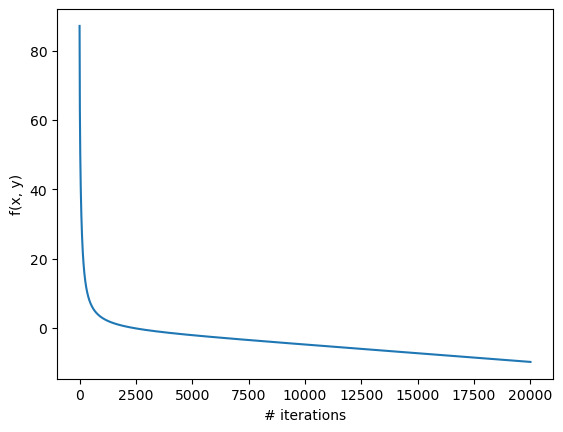

In [3]:
verbose = True
lr = 0.001
epochs = 20000
xs = np.arange(0, epochs + 1, 1)
ys = []

for i in range(epochs + 1):
    # forward
    f = (x - y) ** 3 + y.exp()
    f = f.relu() + y
    ys.append(f.data)

    # backward
    f.backward()
    
    # update params
    x.data -= lr * x.grad
    y.data -= lr * y.grad

    # zero grad for next iteration
    x.zero_grad()
    y.zero_grad()

    # debugging info
    if verbose and i % (epochs / 10) == 0:        
        print(f"[{i}]\tx, y: {x.data} {y.data}: f(x): {f.data}")

# plot f(x, y) over time (iterations)
plt.plot(xs, ys)
plt.xlabel("# iterations")
plt.ylabel("f(x, y)")
plt.show()

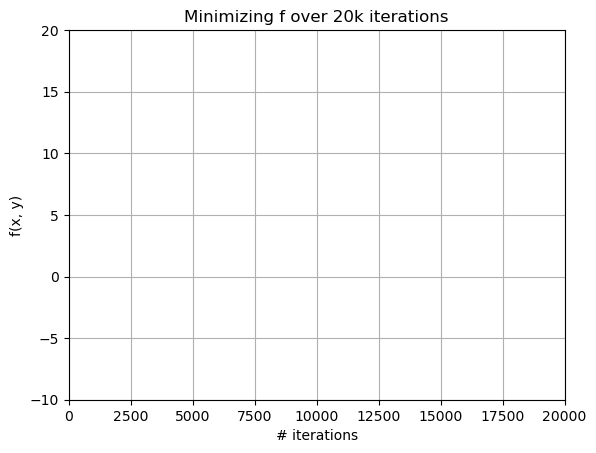

In [4]:
%matplotlib notebook
%matplotlib inline

import matplotlib.animation as animation

sampled_xs = xs[::200]
sampled_ys = ys[::200]

def update(frame):
    plt.cla()  # Clear the previous frame
    plt.plot(sampled_xs[:frame], sampled_ys[:frame])  # Plot ys against xs up to the current frame
    plt.xlim(0, 20000)
    plt.ylim(-10, 20)
    plt.xlabel('# iterations')
    plt.ylabel('f(x, y)')
    plt.title('Minimizing f over 20k iterations')
    plt.grid(True)
    
fig = plt.figure()
ani = animation.FuncAnimation(fig, update, frames=len(sampled_xs), interval=1)  # Interval in milliseconds between frames
writer = animation.FFMpegWriter(fps=30, bitrate=1800)
ani.save('minimize.mp4', writer=writer)